# Exploratory Data Analysis

## 1. Introduction

a completar

### 1.1 Source
For more info about each dataset and their columns, visit the following links:


- **Dataset:** Paradas de Colectivo (GeoJSON)

    - **Link:** [Buenos Aires Data - Paradas de Colectivo][bus_stops]

- **Dataset:** Callejero (GeoJSON)

    - **Link:** [Buenos Aires Data - Callejero][callejero]

- **Dataset:** Comunas (GeoJSON)

    - **Link:** [Buenos Aires Data - Comunas][comunas]

- **Dataset** Barrios (GeoJSON)
    - **Link:** [Buenos Aires Data - Barios][barrios]

[bus_stops]: https://data.buenosaires.gob.ar/dataset/colectivos-paradas/resource/e9699a48-7189-499f-ab3b-d164fd7a1730
[callejero]: https://data.buenosaires.gob.ar/dataset/calles/resource/juqdkmgo-301-resource
[comunas]: https://data.buenosaires.gob.ar/dataset/comunas/resource/b0b627ac-5b47-4574-89ac-6999b63598ee
[barrios]: https://data.buenosaires.gob.ar/dataset/barrios/resource/1c3d185b-fdc9-474b-b41b-9bd960a3806e

### 1.2 Questions:

To complete:
* abc
* def
* ghi

### 1.3 Setup:

#### Imports

In [465]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from shapely.geometry import Point
from pathlib import Path

#### Initial settings

In [466]:
%matplotlib inline
sys.path.append(str(Path.cwd().parent / "src"))

## 2. Loading Data

In [467]:
PROJECT_ROOT = Path.cwd().parent 
DATA_PATH = PROJECT_ROOT / "data" / "raw" 

DATA_PATH.exists()

True

In [468]:
stops_raw = gpd.read_file(DATA_PATH / "paradas-de-colectivo.geojson")

# Make a copy in order to leave the original file intact
stops = stops_raw.copy()
stops[["DIRECCION", "COMUNA", "BARRIO", "L1", "l1_sen", "L2", "geometry"]].head()

,DIRECCION,COMUNA,BARRIO,L1,l1_sen,L2,geometry
0,1524 DEFENSA,1,SAN TELMO,22,V,53,POINT (-58.37099 -34.62566)
1,1528 DEFENSA,1,SAN TELMO,29,I,None,POINT (-58.371 -34.62571)
2,"906 MITRE, BARTOLOME",1,SAN NICOLAS,105,V,None,POINT (-58.37966 -34.60722)
3,51 REGIMIENTO DE PATRICIOS AV.,4,BARRACAS,93,I,70,POINT (-58.37066 -34.63023)
4,389 REGIMIENTO DE PATRICIOS AV.,4,BARRACAS,10,I,22,POINT (-58.37036 -34.63341)


In [469]:
streets_raw = gpd.read_file(DATA_PATH / "callejero.geojson")
streets = streets_raw.copy()
streets[["nomoficial", "alt_izqini", "alt_izqfin", "comuna", "barrio", "geometry"]].head()

,nomoficial,alt_izqini,alt_izqfin,comuna,barrio,geometry
0,"CANTILO, INT.",0,0,13.0,Nuñez,"LINESTRING (-58.46219 -34.53452, -58.46267 -34..."
1,"LUGONES, LEOPOLDO AV.",0,0,13.0,Nuñez,"LINESTRING (-58.46515 -34.53465, -58.46496 -34..."
2,"PAZ, GRAL. AV.",2,300,13.0,Nuñez,"LINESTRING (-58.46561 -34.53507, -58.46577 -34..."
3,DEL LIBERTADOR AV.,0,0,13.0,Nuñez,"LINESTRING (-58.46676 -34.53593, -58.46681 -34..."
4,"COLECTORA CANTILO, INT.",0,0,13.0,Nuñez,"LINESTRING (-58.46065 -34.53512, -58.4608 -34...."


In [470]:
comunas_raw = gpd.read_file(DATA_PATH / "comunas.geojson")
comunas = comunas_raw.copy()
comunas.head()

,id,objeto,comuna,barrios,perimetro,area,geometry
0,1,COMUNA,1,"Constitucion, San Telmo, Monserrat, Retiro, Pu...",36351.19,17801036.28,"MULTIPOLYGON (((-58.34892 -34.61698, -58.34901..."
1,2,COMUNA,2,Recoleta,25965.02,6433391.77,"POLYGON ((-58.38039 -34.56847, -58.38037 -34.5..."
2,3,COMUNA,3,"San Cristobal, Balvanera",10486.26,6385992.08,"POLYGON ((-58.41192 -34.59801, -58.4103 -34.59..."
3,4,COMUNA,4,"Barracas, La Boca, Parque Patricios, Nueva Pom...",35481.84,21690646.89,"POLYGON ((-58.35521 -34.61944, -58.35515 -34.6..."
4,5,COMUNA,5,"Almagro, Boedo",12323.43,6660603.77,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [471]:
barrios_raw = gpd.read_file(DATA_PATH / "barrios.geojson")
barrios = barrios_raw.copy()
barrios.head()

,id,objeto,nombre,comuna,perimetro_,area_metro,geometry
0,1,BARRIO,Agronomia,15,6556.17,2122169.54,"POLYGON ((-58.47589 -34.59173, -58.47598 -34.5..."
1,2,BARRIO,Almagro,5,8537.90,4050752.63,"POLYGON ((-58.416 -34.59786, -58.4157 -34.5978..."
2,3,BARRIO,Balvanera,3,8375.82,4342280.68,"POLYGON ((-58.39294 -34.59964, -58.39277 -34.6..."
3,4,BARRIO,Barracas,4,12846.58,7955144.83,"POLYGON ((-58.37066 -34.6295, -58.37064 -34.62..."
4,5,BARRIO,Belgrano,13,20430.59,8060009.10,"POLYGON ((-58.45167 -34.53565, -58.45168 -34.5..."


## 3. Preprocessing

### Columns

Let's have a look at the columns and then normalize them to lowercase + snake_case

In [472]:
dataframes = [stops, streets, comunas, barrios]
for df in dataframes:
    print(df.columns, "\n" + "=" * 80)


Index(['fid', 'CALLE', 'ALT PLANO', 'DIRECCION', 'coord_X', 'coord_Y',
       'COMUNA', 'BARRIO', 'L1', 'l1_sen', 'L2', 'l2_sen', 'L3', 'l3_sen',
       'L4', 'l4_sen', 'L5', 'l5_sen', 'L6', 'l6_sen', 'geometry'],
      dtype='object') 
Index(['id', 'codigo', 'nomoficial', 'alt_izqini', 'alt_izqfin', 'alt_derini',
       'alt_derfin', 'nomanter', 'nom_mapa', 'tipo_c', 'long', 'sentido',
       'observa', 'bicisenda', 'red_jerarq', 'tipo_ffcc', 'comuna', 'com_par',
       'com_impar', 'barrio', 'barrio_par', 'barrio_imp', 'geometry'],
      dtype='object') 
Index(['id', 'objeto', 'comuna', 'barrios', 'perimetro', 'area', 'geometry'], dtype='object') 
Index(['id', 'objeto', 'nombre', 'comuna', 'perimetro_', 'area_metro',
       'geometry'],
      dtype='object') 


In [473]:
from normalize_columns import normalize_columns

for ds in dataframes:
    ds.columns = normalize_columns(ds.columns)

for df in dataframes:
    print(df.columns, "\n" + "=" * 80)

Index(['fid', 'calle', 'alt_plano', 'direccion', 'coord_x', 'coord_y',
       'comuna', 'barrio', 'l1', 'l1_sen', 'l2', 'l2_sen', 'l3', 'l3_sen',
       'l4', 'l4_sen', 'l5', 'l5_sen', 'l6', 'l6_sen', 'geometry'],
      dtype='object') 
Index(['id', 'codigo', 'nomoficial', 'alt_izqini', 'alt_izqfin', 'alt_derini',
       'alt_derfin', 'nomanter', 'nom_mapa', 'tipo_c', 'long', 'sentido',
       'observa', 'bicisenda', 'red_jerarq', 'tipo_ffcc', 'comuna', 'com_par',
       'com_impar', 'barrio', 'barrio_par', 'barrio_imp', 'geometry'],
      dtype='object') 
Index(['id', 'objeto', 'comuna', 'barrios', 'perimetro', 'area', 'geometry'], dtype='object') 
Index(['id', 'objeto', 'nombre', 'comuna', 'perimetro', 'area_metro',
       'geometry'],
      dtype='object') 


I will also rename the column nomoficial in streets for nom_oficial


In [474]:
streets.rename(columns={"nomoficial": "nom_oficial"}, inplace=True)
streets["nom_oficial"].head(3)


0            CANTILO, INT.
1    LUGONES, LEOPOLDO AV.
2           PAZ, GRAL. AV.
Name: nom_oficial, dtype: object

### Dtypes

Let's check some relevant dtypes of the stops DataFrame:

In [475]:
stops[["comuna","l1","l2","l3","l4","l5","l6","geometry"]].dtypes

comuna        object
l1            object
l2            object
l3            object
l4            object
l5            object
l6            object
geometry    geometry
dtype: object

#### **l1-l6** and **comuna** to integers

Now I will convert the columns **l1-l6** and **comuna** to int type (bus lines and commune numbers are integers):

In [476]:
cols_to_convert = ["comuna","l1", "l2", "l3", "l4", "l5", "l6"]
for col in cols_to_convert:
    stops[col] = pd.to_numeric(stops[col], errors="coerce").astype('Int64')

stops[cols_to_convert].dtypes

comuna    Int64
l1        Int64
l2        Int64
l3        Int64
l4        Int64
l5        Int64
l6        Int64
dtype: object

I will create a column **n_lines** as the number of non-null line fields (**l1-l6**) per stop

In [477]:
line_cols = ["l1", "l2", "l3", "l4", "l5", "l6"]
stops["n_lines"] = stops[line_cols].notna().sum(axis=1)
stops[["direccion","n_lines"]].head()

,direccion,n_lines
0,1524 DEFENSA,2
1,1528 DEFENSA,1
2,"906 MITRE, BARTOLOME",1
3,51 REGIMIENTO DE PATRICIOS AV.,3
4,389 REGIMIENTO DE PATRICIOS AV.,2


Let's check some relevant dtypes of the streets DataFrame:

In [478]:
streets[["alt_izqini","alt_izqfin",
         "alt_derini","alt_derfin",
         "comuna","com_par","com_impar"]].dtypes

alt_izqini      int32
alt_izqfin      int32
alt_derini      int32
alt_derfin      int32
comuna        float64
com_par       float64
com_impar     float64
dtype: object

### **comuna**, **com_par**, **com_impar** to integers

Let's convert the columns with the associated commune/comuna to integers: 

In [479]:
cols_to_convert = ["comuna", "com_par", "com_impar"]
for col in cols_to_convert:
    streets[col] = pd.to_numeric(streets[col], errors="coerce").astype('Int64')

streets[cols_to_convert].dtypes

comuna       Int64
com_par      Int64
com_impar    Int64
dtype: object

Let's check the dtypes of the comunas DataFrame:

In [480]:
comunas.dtypes

id              int32
objeto         object
comuna          int32
barrios        object
perimetro     float64
area          float64
geometry     geometry
dtype: object

Let's check the dtypes of the barrios DataFrame:

In [481]:
barrios.dtypes

id               int32
objeto          object
nombre          object
comuna           int32
perimetro      float64
area_metro     float64
geometry      geometry
dtype: object

### Check Coordinate Reference System (CRS)

The CRS (Coordinate Reference System) defines how numerical coordinates are mapped to positions on the Earth's surface. It is important to verify that all GeoDataFrames share the same CRS before performing spatial operations.



In [482]:
for ds in dataframes:
    print(ds.crs)

EPSG:4326
EPSG:4326
EPSG:4326
EPSG:4326


## 4. Data Quality

### Percentage of Missing values by critical columns

In [483]:
stops_missing_perc = (stops[["calle","alt_plano","direccion","comuna","barrio","geometry","n_lines"]].isna()
        .mean()
        .mul(100)
        .sort_values(ascending=False))
stops_missing_perc

alt_plano    0.746912
direccion    0.043091
barrio       0.014364
calle        0.000000
comuna       0.000000
geometry     0.000000
n_lines      0.000000
dtype: float64

Overall, the dataset presents a very high level of completeness, with all critical fields showing less than 1% of missing values. In particular, both **calle** and **geometry**, which are essential for spatial and semantic analysis, show 0% missing values.

### Communes by missing values
Is missingness geographically concentrated?

In [484]:
critical_cols = ["calle", "geometry", "comuna", "barrio"]

stops["is_incomplete"] = stops[critical_cols].isna().any(axis=1)

missing_by_comuna = (
    stops.groupby("comuna")["is_incomplete"]
         .mean()
         .mul(100)
         .sort_values(ascending=False)
)
missing_by_comuna.head(3)


comuna
15    0.188324
1     0.000000
3     0.000000
Name: is_incomplete, dtype: float64

### Encoding/Text issues

While exploring the **paradas-de-colectivo** GeoJSON file, I noticed that some characters (e.g., `Ñ`, accented vowels) appear corrupted in the fields **calle**, **direccion**, and **barrio** (e.g., `NU�EZ` instead of `NUÑEZ`). This � symbol is the Unicode *replacement character* (U+FFFD). There are also some values that have `?`. In the next cells, I quantify how many rows are affected and list the most frequent corrupted values.

Let's see what are the most corrupted values per column:


In [485]:
import re 

corrupt_pattern = re.compile(r"[\ufffd?]")

cols_to_check = ["calle", "barrio"]
for col in cols_to_check:
    corrupted_vals = stops.loc[
        (stops[col].str.contains(corrupt_pattern, na=False)),
        col]
    print(f"The most corrupted values in {col} are:")
    display(corrupted_vals.value_counts().head())

The most corrupted values in calle are:


calle
CASTA�ARES AV.                    23
ALEJANDRO MARGARI�OS CERVANTES    21
RODRIGUEZ PE�A                    17
PRES. LUIS SAENZ PE�A             14
NU�EZ                             14
Name: count, dtype: int64

The most corrupted values in barrio are:


barrio
NU�EZ    74
Name: count, dtype: int64

Let's see what the percentage of values with encoding issues are:

In [486]:
stops["has_encoding_issue"] = (
    stops[["calle", "barrio"]]
    .astype(str)
    .apply(lambda col: col.str.contains(corrupt_pattern))
    .any(axis=1)
)
before_perc = stops["has_encoding_issue"].mean() * 100
before_perc

np.float64(3.3611031312841133)

First I will normalize strings in all DataFrames. I wil not delete `�`and `?` so later I can work only with the corrupted strings.

In [488]:
from normalize_strings import normalize_strings

mappings = {
      "stops": [stops, ["calle", "barrio"]],
      "streets": [streets, ["nom_oficial", "barrio"]],
      "comunas": [comunas, ["barrios"]],
      "barrios": [barrios, ["nombre"]]
}

for name, (df, cols) in mappings.items():
    for col in cols:
            df[col] = df[col].apply(
                  lambda x: normalize_strings(x, keep_replacement_char=True, keep_question_mark=True)
            )

Let's grab all the corrupted values:

In [489]:
corrupt_names = stops.loc[stops["calle"].str.contains(r"\ufffd|\?", regex=True), "calle"].unique()
corrupt_names

array(['RODRIGUEZ PE�A', 'PRES LUIS SAENZ PE�A',
       'PRES ROQUE SAENZ PE�A AV', 'ALEJANDRO MARGARI�OS CERVANTES',
       'MU�ECAS', 'ALBARI�O', 'COLOMBIA AV Y CERVI�O AV', 'CERVI�O AV',
       'HUMBERTO 1�', 'MU�IZ', 'CASTA�ARES AV', 'CA�ADA DE GOMEZ',
       'NU�EZ', 'O�BRIEN', 'NICASIO ORO�O', 'ESPA�A AV', 'A�ASCO',
       'VILLAFA�E WENCESLAO'], dtype=object)

Now let's try to match the corrupted values with the normal ones in streets DataFrame:

In [490]:
matches = {}

for cname in corrupt_names:
    pattern = cname.replace("\ufffd", ".?")
    mask = streets["nom_oficial"].str.contains(pattern, regex=True, na=False)
    candidates = streets.loc[mask, "nom_oficial"].unique().tolist()
    matches[cname] = [c for c in candidates if len(c) == len(cname) or len(c) == len(cname) - 1]

matches

{'RODRIGUEZ PE�A': ['RODRIGUEZ PEÑA'],
 'PRES LUIS SAENZ PE�A': [],
 'PRES ROQUE SAENZ PE�A AV': [],
 'ALEJANDRO MARGARI�OS CERVANTES': [],
 'MU�ECAS': ['MUÑECAS'],
 'ALBARI�O': ['ALBARIÑO'],
 'COLOMBIA AV Y CERVI�O AV': [],
 'CERVI�O AV': ['CERVIÑO AV'],
 'HUMBERTO 1�': ['HUMBERTO 1'],
 'MU�IZ': ['MUÑIZ'],
 'CASTA�ARES AV': ['CASTAÑARES AV'],
 'CA�ADA DE GOMEZ': ['CAÑADA DE GOMEZ'],
 'NU�EZ': ['NUÑEZ'],
 'O�BRIEN': ['OBRIEN'],
 'NICASIO ORO�O': [],
 'ESPA�A AV': ['ESPAÑA AV'],
 'A�ASCO': ['AÑASCO'],
 'VILLAFA�E WENCESLAO': ['VILLAFAÑE WENCESLAO']}

Now i will correct the remaining values hardcoding them, using public information of the well known streets names: 

In [491]:
manual_fixes = {
    "ALEJANDRO MARGARI�OS CERVANTES": ["ALEJANDRO MAGARIÑOS CERVANTES"],
    "PRES LUIS SAENZ PE�A": ["PRES LUIS SAENZ PEÑA"],
    "PRES ROQUE SAENZ PE�A AV": ["PRES ROQUE SAENZ PEÑA AV"],
    "NICASIO ORO�O": ["NICASIO OROÑO"],
    "COLOMBIA AV Y CERVI�O AV": ["COLOMBIA AV Y CERVIÑO AV"],
}
matches.update(manual_fixes)

Now replace the values with the mapping, and also i will correct the value NU�EZ in the column **barrio** with the correct name (NUÑEZ):

In [492]:
# Grab only the values with a coincidence
mapping = {
    k: v[0]
    for k, v in matches.items()
    if len(v) == 1
}
stops["calle"] = stops["calle"].replace(mapping)
stops["barrio"] = stops["barrio"].replace(to_replace="NU\ufffdEZ", value="NUÑEZ", regex=False)

Let's see the percentage of encoding issues left: 

In [493]:
stops["has_encoding_issue"] = (
    stops[["calle", "barrio"]]
    .apply(lambda col: col.str.contains(corrupt_pattern))
    .any(axis=1)
)
after_perc = stops["has_encoding_issue"].mean() * 100
after_perc

np.float64(0.0)

The figure below compares the percentage of rows affected by encoding issues before and after the correction process.

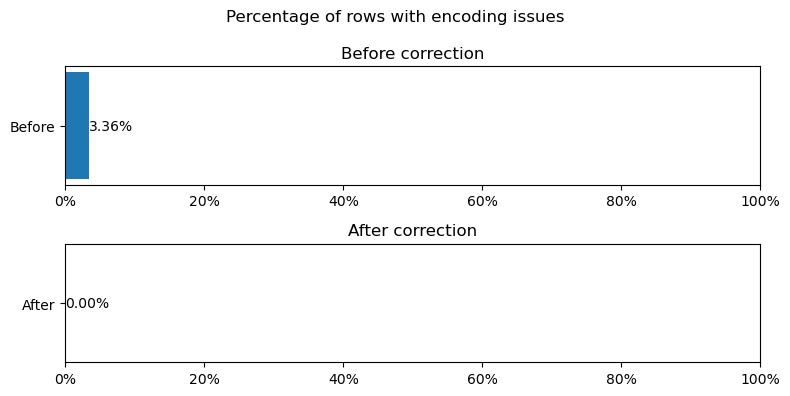

In [539]:
from matplotlib.ticker import PercentFormatter
fig, axes = plt.subplots(2, 1, figsize=(8, 4))

axes[0].set_title("Before correction")
axes[0].barh(["Before"], [before_perc])
axes[0].set_xlim(0, 100)
axes[0].xaxis.set_major_formatter(PercentFormatter())
axes[0].text(before_perc, 0, f"{before_perc:.2f}%", va="center")

axes[1].set_title("After correction")
axes[1].barh(["After"], [after_perc])
axes[1].set_xlim(0, 100)
axes[1].xaxis.set_major_formatter(PercentFormatter())
axes[1].text(after_perc, 0, f"{after_perc:.2f}%", va="center")

fig.suptitle("Percentage of rows with encoding issues", fontsize=12)
plt.tight_layout()
